<a href="https://colab.research.google.com/github/SudiptoChowdhury25/ML-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Sudipta Roy Chowdhury**

ID: **2215151025**

Section: **7A1**

Course: **Machine Learning LAB**


# ML Project: Rock Paper Scissors Classifier using Transfer Learning (MobileNetV2)

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
# Load dataset
(train_ds, val_ds), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.M0552G_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.M0552G_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [3]:
# Preprocessing
IMG_SIZE = (160, 160)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def format_example(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0
    return image, label

train_ds = train_ds.map(format_example).shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds = val_ds.map(format_example).batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [4]:
# Transfer Learning Model
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 725ms/step - accuracy: 0.6942 - loss: 0.7612 - val_accuracy: 0.9901 - val_loss: 0.1010
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 692ms/step - accuracy: 0.9914 - loss: 0.0776 - val_accuracy: 0.9940 - val_loss: 0.0531
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 635ms/step - accuracy: 0.9976 - loss: 0.0392 - val_accuracy: 0.9960 - val_loss: 0.0359
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 629ms/step - accuracy: 0.9995 - loss: 0.0281 - val_accuracy: 0.9980 - val_loss: 0.0258
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 657ms/step - accuracy: 0.9999 - loss: 0.0174 - val_accuracy: 0.9980 - val_loss: 0.0185


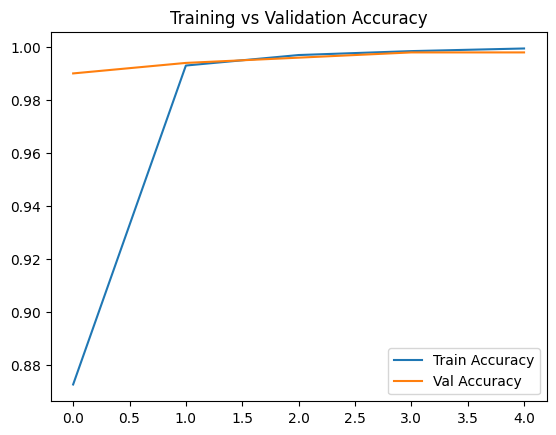

In [5]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

**This graph shows the accuracy of the model on both the training and validation datasets across 5 epochs. The blue line represents training accuracy, and the orange line represents validation accuracy. Both lines steadily increase and reach around 99.9%, indicating excellent learning performance with no overfitting. This suggests that the model is generalizing well on unseen data—likely due to effective use of transfer learning.**